# §106. English Qatal Translation Overview

The dataset is as many qatal verbs that:

* do not have a prepended waw
* we have a successful link between the Hebrew word and the translation
* the parse is not erroneous or spurious (filtered out bad cases)
    
In this NB, "pr" refers to proportions taken across rows (percentages when multiplied by 100).

"oneN" refers to odds, read as "one in N"

Various tags are used to refer to English Tense, Aspect, Modality construtions (TAM).

In [1]:
# set up code and variables, see my_tools.py for unseen vars

from my_tools import *

ts = TextShower(
    default=['ref', 'text_full', 'sentence', 
             'esv_TAMspan', 'esv_TAM', 
             'niv_TAMspan', 'niv_TAM']
)

/Users/cody/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
qatal_dfs.columns

Index(['ref', 'book', 'book_super', 'canon_part', 'text_full', 'text_plain',
       'lex', 'lex_etcbc', 'gloss', 'verb_form', 'stem', 'person', 'gender',
       'number', 'clause_atom', 'clause', 'sentence', 'genre', 'domain',
       'domain2', 'period', 'txt_type', 'clause_type', 'cltype_simp',
       'clause_rela', 'mother_clause', 'mother_type', 'mother_verbtype',
       'mother_rela', 'mother_domain2', 'daught_clause', 'daught_type',
       'daught_verbtype', 'daught_rela', 'daught_domain2', 'valence',
       'prec_lexes', 'prec_pos', 'prec_part', 'lxx', 'lxx_tense', 'lxx_voice',
       'lxx_mood', 'lxx_person', 'lxx_number', 'lxx_tm', 'esv', 'esv_tags',
       'esv_VBtags', 'esv_verse', 'esv_tense', 'esv_aspect', 'esv_modality',
       'esv_TAM', 'esv_TAMtag', 'esv_TAMspan', 'niv', 'niv_tags', 'niv_VBtags',
       'niv_verse', 'niv_tense', 'niv_aspect', 'niv_modality', 'niv_TAM',
       'niv_TAMtag', 'niv_TAMspan', 'safe'],
      dtype='object')

## Rough sense of TAM tag quantities

In [3]:
qatal_dfs.esv_TAM.value_counts()

PAST..IND             5203
PRES.PERF.IND         3432
PRES..IND             2632
PAST.PERF.IND         1420
PRES..IMPV             240
PRES..MOD              138
PAST..SUBJ              97
FUT..IND                90
PRES..                  76
PAST.PROG.IND           28
PRES.PROG.IND           20
..                      14
PRES.PERF_PROG.IND       5
FUT.PERF.IND             4
past.PERF_PROG.IND       2
Name: esv_TAM, dtype: int64

In [4]:
qatal_dfs.niv_TAM.value_counts()

PAST..IND             4994
PRES.PERF.IND         2753
PRES..IND             2662
PAST.PERF.IND         1472
FUT..IND               352
PRES..IMPV             244
PRES..                 145
PRES..MOD              115
PAST..SUBJ              91
PRES.PROG.IND           74
..                      54
PAST.PROG.IND           49
past.PERF_PROG.IND       9
PRES.PERF_PROG.IND       8
FUT..MOD                 3
FUT.PERF.IND             3
Name: niv_TAM, dtype: int64

Some of these are either very rare or spurious (e.g. PRES..IMPV [imperative]; caused by 
shortcomings in the English parser)

## Setup Translation Data

Filter out spurious or rare data.

In [5]:
# based on above counts, we want to
# for the moment exclude idiosyncratic translations
# especially translations that might actually be 
# bad parses

main_semantics = [
    'PAST..IND',     # she wrote
    'PRES.PERF.IND', # he has written
    'PRES..IND',     # she writes
    'PAST.PERF.IND', # she had written
]

# remove cases of 'did not' for now since these are semantically ambiguous
qatal_dfs2 = qatal_dfs[
    (~qatal_dfs.esv_TAMspan.str.match('.*did not.*', na=False))
    & (~qatal_dfs.niv_TAMspan.str.match('.*did not.*', na=False))
]


# make a set of dfs with respective data and prerequisites
esv_df = qatal_dfs2[qatal_dfs2.esv_TAM.isin(main_semantics)]
niv_df = qatal_dfs2[qatal_dfs2.niv_TAM.isin(main_semantics)]
eng_df = qatal_dfs2.loc[list(set(esv_df.index) & set(niv_df.index))] # both parses are in main semantics

In [6]:
esv_df.shape # i.e. dimensions of the new tables

(12213, 67)

In [7]:
niv_df.shape

(11446, 67)

In [8]:
eng_df.shape

(10991, 67)

## General Counts by Translation

In [9]:
esv_tam_ct = eng_df.esv_TAM.value_counts()
esv_tam_pr = prop_table(esv_tam_ct)
niv_tam_ct = eng_df.niv_TAM.value_counts()
niv_tam_pr = prop_table(niv_tam_ct)

### ESV

In [10]:
esv_tam_ct

PAST..IND        4701
PRES.PERF.IND    3095
PRES..IND        2268
PAST.PERF.IND     927
Name: esv_TAM, dtype: int64

In [11]:
esv_tam_pr

PAST..IND        0.427714
PRES.PERF.IND    0.281594
PRES..IND        0.206351
PAST.PERF.IND    0.084342
Name: esv_TAM, dtype: float64

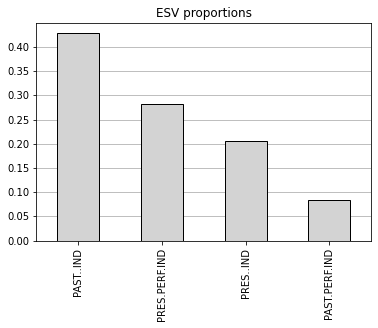

In [12]:
plot_bar_1D(esv_tam_pr, title='ESV proportions')

### NIV

In [13]:
niv_tam_ct

PAST..IND        4737
PRES.PERF.IND    2671
PRES..IND        2486
PAST.PERF.IND    1097
Name: niv_TAM, dtype: int64

In [14]:
niv_tam_pr

PAST..IND        0.430989
PRES.PERF.IND    0.243017
PRES..IND        0.226185
PAST.PERF.IND    0.099809
Name: niv_TAM, dtype: float64

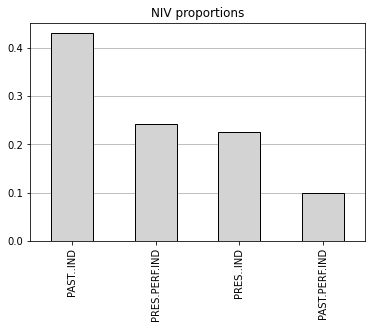

In [15]:
plot_bar_1D(niv_tam_pr, title='NIV proportions')

## Compare Translations

### Diagreements

In [16]:
disag_df = eng_df[eng_df.esv_TAM != eng_df.niv_TAM]

disags = Analyze(disag_df, 'esv_TAM', 'niv_TAM', fishers=False)

disags.show()

counts:


niv_TAM,PAST..IND,PRES..IND,PRES.PERF.IND,PAST.PERF.IND
esv_TAM,,,,
PRES.PERF.IND,410,293,0,38
PAST..IND,0,130,180,275
PRES..IND,77,0,127,2
PAST.PERF.IND,134,1,10,0



proportions 1:


niv_TAM,PAST..IND,PRES..IND,PRES.PERF.IND,PAST.PERF.IND
esv_TAM,,,,
PRES.PERF.IND,0.553306,0.395412,0.000000,0.051282
PAST..IND,0.000000,0.222222,0.307692,0.470085
PRES..IND,0.373786,0.000000,0.616505,0.009709
PAST.PERF.IND,0.924138,0.006897,0.068966,0.000000


None


proportions 2:


esv_TAM,PRES.PERF.IND,PAST..IND,PRES..IND,PAST.PERF.IND
niv_TAM,,,,
PAST..IND,0.660225,0.000000,0.123994,0.215781
PRES..IND,0.691038,0.306604,0.000000,0.002358
PRES.PERF.IND,0.000000,0.567823,0.400631,0.031546
PAST.PERF.IND,0.120635,0.873016,0.006349,0.000000


None

### Count 1-dimensionally

Rather than tracking which TAM belong to which translation, we want to count
by simple TAM interchanges between the two translations. We do that below.

In [66]:
combined_disag = (disag_df.esv_TAM + ' ' + disag_df.niv_TAM)

# do a bit of re-arranging of the strings so that we can
# ignore whether ESV/NIV has x or y and pay attention to 
# simple interchanges between TAM x and TAM y
interchanges = []

for interchange in combined_disag:
    new_i = sorted(interchange.split()) # strings remapped alphabetically
    new_i = '{} ~ {}'.format(*new_i)
    interchanges.append(new_i)

# convert back to series and build counts
interchanges = pd.Series(interchanges, index=combined_disag.index)
inter_ct = interchanges.value_counts()
inter_pr = prop_table(inter_ct)

# add a TAM interchange column to the eng_df
eng_df['TAM_inter'] = interchanges

inter_ct

PAST..IND ~ PRES.PERF.IND        590
PRES..IND ~ PRES.PERF.IND        420
PAST..IND ~ PAST.PERF.IND        409
PAST..IND ~ PRES..IND            207
PAST.PERF.IND ~ PRES.PERF.IND     48
PAST.PERF.IND ~ PRES..IND          3
dtype: int64

In [67]:
inter_pr

PAST..IND ~ PRES.PERF.IND        0.351819
PRES..IND ~ PRES.PERF.IND        0.250447
PAST..IND ~ PAST.PERF.IND        0.243888
PAST..IND ~ PRES..IND            0.123435
PAST.PERF.IND ~ PRES.PERF.IND    0.028623
PAST.PERF.IND ~ PRES..IND        0.001789
dtype: float64

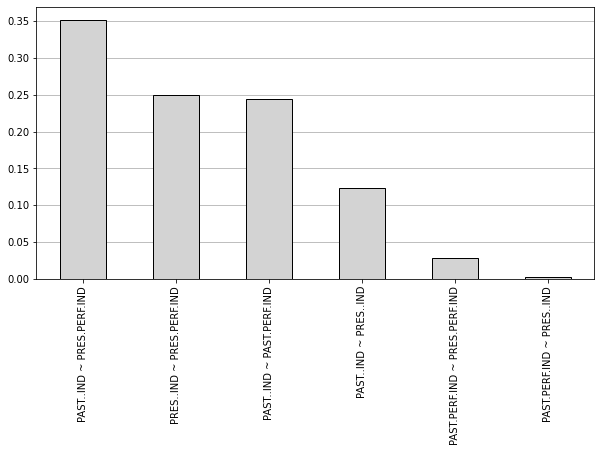

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_bar_1D(inter_pr, ax)

### Examine effects of genre on disagreements

In [29]:
# add a column for counting by genre
eng_df['disagree'] = eng_df.esv_TAM != eng_df.niv_TAM

In [49]:
ag_genre_ct = pivot_table(eng_df, 'genre', 'disagree')
ag_genre_pr = prop_table(ag_genre_ct)
ag_genre_pr2 = prop_table(ag_genre_ct.T)
ag_genre_oneN = 1 / ag_genre_pr

ag_genre_ct

disagree,False,True
genre,,
instruction,333,96
list,258,21
poetry,1780,387
prophetic,2436,465
prose,4507,708


In [50]:
ag_genre_pr

disagree,False,True
genre,,
instruction,0.776224,0.223776
list,0.924731,0.075269
poetry,0.821412,0.178588
prophetic,0.839710,0.160290
prose,0.864238,0.135762


In [45]:
ag_genre_pr2

genre,instruction,list,poetry,prophetic,prose
disagree,,,,,
False,0.035753,0.027700,0.191110,0.261542,0.483895
True,0.057245,0.012522,0.230769,0.277281,0.422182


In [51]:
ag_genre_oneN

disagree,False,True
genre,,
instruction,1.288288,4.468750
list,1.081395,13.285714
poetry,1.217416,5.599483
prophetic,1.190887,6.238710
prose,1.157089,7.365819


### TAM interchanges by Genre

counts:


TAM_inter,PAST..IND ~ PRES.PERF.IND,PRES..IND ~ PRES.PERF.IND,PAST..IND ~ PAST.PERF.IND,PAST..IND ~ PRES..IND,PAST.PERF.IND ~ PRES.PERF.IND,PAST.PERF.IND ~ PRES..IND
genre,,,,,,
prose,249,75,305,44,34,1
prophetic,180,169,46,61,9,0
poetry,132,148,18,82,5,2
instruction,29,28,22,17,0,0
list,0,0,18,3,0,0



proportions 1:


TAM_inter,PAST..IND ~ PRES.PERF.IND,PRES..IND ~ PRES.PERF.IND,PAST..IND ~ PAST.PERF.IND,PAST..IND ~ PRES..IND,PAST.PERF.IND ~ PRES.PERF.IND,PAST.PERF.IND ~ PRES..IND
genre,,,,,,
prose,0.351695,0.105932,0.430791,0.062147,0.048023,0.001412
prophetic,0.387097,0.363441,0.098925,0.131183,0.019355,0.000000
poetry,0.341085,0.382429,0.046512,0.211886,0.012920,0.005168
instruction,0.302083,0.291667,0.229167,0.177083,0.000000,0.000000
list,0.000000,0.000000,0.857143,0.142857,0.000000,0.000000


None


proportions 2:


genre,prose,prophetic,poetry,instruction,list
TAM_inter,,,,,
PAST..IND ~ PRES.PERF.IND,0.422034,0.305085,0.223729,0.049153,0.000000
PRES..IND ~ PRES.PERF.IND,0.178571,0.402381,0.352381,0.066667,0.000000
PAST..IND ~ PAST.PERF.IND,0.745721,0.112469,0.044010,0.053790,0.044010
PAST..IND ~ PRES..IND,0.212560,0.294686,0.396135,0.082126,0.014493
PAST.PERF.IND ~ PRES.PERF.IND,0.708333,0.187500,0.104167,0.000000,0.000000
PAST.PERF.IND ~ PRES..IND,0.333333,0.000000,0.666667,0.000000,0.000000


None


Fisher's test with log transform:


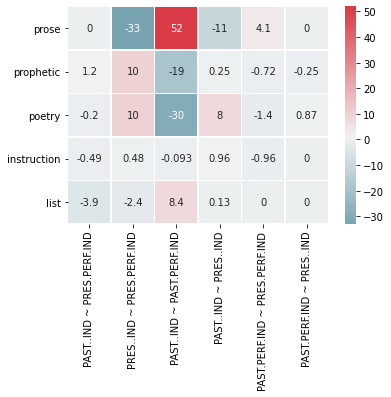

In [74]:
gen_tami = Analyze(eng_df, 'genre', 'TAM_inter')

gen_tami.show()

## ESV Semantic Type Contexts / Collocations

In [13]:
sem_genre = PivotProp(qsem_df, 'esv_TAM', 'genre')
sem_domain = PivotProp(qsem_df, 'esv_TAM', 'domain')
sem_canon = PivotProp(qsem_df, 'esv_TAM', 'canon_part')
sem_period = PivotProp(qsem_df, 'esv_TAM', 'period')
sem_gendom = PivotProp(qsem_df[qsem_df.domain.isin(['Q', 'N'])], 'esv_TAM', ['genre', 'domain'])
sem_clause = PivotProp(qsem_df, 'esv_TAM', 'clause_type')
sem_ptcls = PivotProp(qsem_df, 'esv_TAM', 'prec_part')

# Fishers with log transform tests
sem_genre_fish, sg_odds = my_stats.apply_fishers(sem_genre.ct, 0, 1)
sem_domain_fish, sd_odds = my_stats.apply_fishers(sem_domain.ct, 0, 1)
sem_canon_fish, sc_odds = my_stats.apply_fishers(sem_canon.ct, 0, 1)
sem_period_fish, sp_odds = my_stats.apply_fishers(sem_period.ct, 0, 1)
sem_clause_fish, scl_odds = my_stats.apply_fishers(sem_clause.ct, 0, 1)
sem_ptcls_fish, spt_odds = my_stats.apply_fishers(sem_ptcls.ct, 0, 1)

### Genre

In [14]:
sem_genre.ct

genre,prose,prophetic,poetry,instruction,list
esv_TAM,,,,,
PAST..IND,3076,921,698,204,304
PRES.PERF.IND,1410,1110,717,186,9
PRES..IND,430,1209,922,65,6
PAST.PERF.IND,1077,190,88,40,25


In [15]:
sem_genre.pr

genre,prose,prophetic,poetry,instruction,list
esv_TAM,,,,,
PAST..IND,0.591197,0.177013,0.134153,0.039208,0.058428
PRES.PERF.IND,0.410839,0.323427,0.208916,0.054196,0.002622
PRES..IND,0.163374,0.459347,0.350304,0.024696,0.002280
PAST.PERF.IND,0.758451,0.133803,0.061972,0.028169,0.017606


In [16]:
sem_genre.pr2

esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
genre,,,,
prose,0.513265,0.235274,0.071750,0.179710
prophetic,0.268513,0.323615,0.352478,0.055394
poetry,0.287835,0.295670,0.380206,0.036289
instruction,0.412121,0.375758,0.131313,0.080808
list,0.883721,0.026163,0.017442,0.072674


In [17]:
sem_genre.oneN

genre,prose,prophetic,poetry,instruction,list
esv_TAM,,,,,
PAST..IND,1.691482,5.649294,7.454155,25.504902,17.115132
PRES.PERF.IND,2.434043,3.091892,4.786611,18.451613,381.333333
PRES..IND,6.120930,2.177006,2.854664,40.492308,438.666667
PAST.PERF.IND,1.318477,7.473684,16.136364,35.500000,56.800000


In [18]:
sem_genre_fish

,prose,prophetic,poetry,instruction,list
PAST..IND,110.336809,-88.904208,-42.791784,0.033485,76.203590
PRES.PERF.IND,-16.554268,15.219415,2.677706,6.670316,-34.156459
PRES..IND,-301.258175,122.705037,107.333442,-5.020306,-25.948399
PAST.PERF.IND,119.228236,-38.301110,-47.672588,-1.619508,-1.724623


### Domain

In [19]:
sem_domain.ct

domain,Q,N,?,D
esv_TAM,,,,
PAST..IND,2094,2552,460,97
PRES.PERF.IND,3193,118,61,60
PRES..IND,2297,79,191,65
PAST.PERF.IND,280,1061,57,22


In [20]:
sem_domain.pr

domain,Q,N,?,D
esv_TAM,,,,
PAST..IND,0.402460,0.490486,0.088411,0.018643
PRES.PERF.IND,0.930361,0.034382,0.017774,0.017483
PRES..IND,0.872720,0.030015,0.072568,0.024696
PAST.PERF.IND,0.197183,0.747183,0.040141,0.015493


In [21]:
sem_domain.pr2

esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
domain,,,,
Q,0.266277,0.406027,0.292091,0.035605
N,0.669816,0.030971,0.020735,0.278478
?,0.598179,0.079324,0.248375,0.074122
D,0.397541,0.245902,0.266393,0.090164


In [22]:
sem_domain.oneN

domain,Q,N,?,D
esv_TAM,,,,
PAST..IND,2.484718,2.038793,11.310870,53.639175
PRES.PERF.IND,1.074851,29.084746,56.262295,57.200000
PRES..IND,1.145842,33.316456,13.780105,40.492308
PAST.PERF.IND,5.071429,1.338360,24.912281,64.545455


In [20]:
sem_domain_fish

,Q,N,?,D
PAST..IND,-inf,inf,26.411236,-0.129204
PRES.PERF.IND,inf,-inf,-41.742762,-0.415614
PRES..IND,221.089944,-inf,2.303986,1.592284
PAST.PERF.IND,-264.069163,303.170899,-3.328582,-0.514203


### Genre+Domain (Gendom)

In [23]:
sem_gendom.ct

genre         prose       prophetic poetry prophetic instruction list poetry instruction list
domain            N     Q         Q      Q         N           Q    N      N           N    Q
esv_TAM                                                                                      
PAST..IND      1963   863       614    522       224          89  159    111          95    6
PRES.PERF.IND    54  1353      1015    658        54         159    1      8           1    8
PRES..IND        18   412      1040    790        47          55    4      9           1    0
PAST.PERF.IND   889   136        84     47       101          11   16     28          27    2

In [24]:
sem_gendom.pr

genre             prose           prophetic    poetry  ...      list    poetry instruction      list
domain                N         Q         Q         Q  ...         N         N           N         Q
esv_TAM                                                ...                                          
PAST..IND      0.422514  0.185751  0.132157  0.112355  ...  0.034223  0.023892    0.020448  0.001291
PRES.PERF.IND  0.016309  0.408638  0.306554  0.198732  ...  0.000302  0.002416    0.000302  0.002416
PRES..IND      0.007576  0.173401  0.437710  0.332492  ...  0.001684  0.003788    0.000421  0.000000
PAST.PERF.IND  0.662938  0.101417  0.062640  0.035048  ...  0.011931  0.020880    0.020134  0.001491

[4 rows x 10 columns]

In [25]:
sem_gendom.oneN

genre               prose            prophetic  ...      poetry  instruction        list
domain                  N         Q          Q  ...           N            N           Q
esv_TAM                                         ...                                     
PAST..IND        2.366786  5.383546   7.566775  ...   41.855856    48.905263  774.333333
PRES.PERF.IND   61.314815  2.447154   3.262069  ...  413.875000  3311.000000  413.875000
PRES..IND      132.000000  5.766990   2.284615  ...  264.000000  2376.000000         inf
PAST.PERF.IND    1.508436  9.860294  15.964286  ...   47.892857    49.666667  670.500000

[4 rows x 10 columns]

Why might certain contexts be simple-past translations but marked as quotation rather than narration?

In [26]:
show_text(qatal_dfs[
    (qatal_dfs.genre == 'prose')
    & (qatal_dfs.domain == 'Q')
    & (qatal_dfs.esv_TAM == 'PAST..IND')
], spread=10, cols=['domain'])

showing 10 of 863


,ref,sentence,text_full,lxx,lxx_tm,esv,esv_TAM,domain
bhsa_node,,,,,,,,
1137,Genesis 2:23,כִּ֥י מֵאִ֖ישׁ לֻֽקֳחָה־זֹּֽאת׃,לֻֽקֳחָה,ἐλήμφθη,aorist indc,was taken,PAST..IND,Q
27508,Genesis 48:11,רְאֹ֥ה פָנֶ֖יךָ לֹ֣א פִלָּ֑לְתִּי,פִלָּ֑לְתִּי,ἐστερήθην,aorist indc,I expected,PAST..IND,Q
85382,Numbers 24:11,אָמַ֨רְתִּי֙,אָמַ֨רְתִּי֙,εἶπα,aorist indc,I said,PAST..IND,Q
99701,Deuteronomy 11:6,וִֽידַעְתֶּם֮ הַיֹּום֒ כִּ֣י׀ לֹ֣א אֶת־בְּנֵיכֶ֗ם אֲשֶׁ֤ר לֹֽא־יָדְעוּ֙ וַאֲשֶׁ֣ר לֹא־רָא֔וּ אֶת־מוּסַ֖ר יְהוָ֣ה אֱלֹהֵיכֶ֑ם אֶת־גָּדְלֹ֕ו אֶת־יָדֹו֙ הַחֲזָקָ֔ה וּזְרֹעֹ֖ו הַנְּטוּיָֽה׃ וְאֶת־אֹֽתֹתָיו֙ וְאֶֽת־מַעֲשָׂ֔יו אֲשֶׁ֥ר עָשָׂ֖ה בְּתֹ֣וךְ מִצְרָ֑יִם לְפַרְעֹ֥ה מֶֽלֶךְ־מִצְרַ֖יִם וּלְכָל־אַרְצֹֽו׃ וַאֲשֶׁ֣ר עָשָׂה֩ לְחֵ֨יל מִצְרַ֜יִם לְסוּסָ֣יו וּלְרִכְבֹּ֗ו אֲשֶׁ֨ר הֵצִ֜יף אֶת־מֵ֤י יַם־סוּף֙ עַל־פְּנֵיהֶ֔ם בְּרָדְפָ֖ם אַחֲרֵיכֶ֑ם וַיְאַבְּדֵ֣ם יְהוָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ וַאֲשֶׁ֥ר עָשָׂ֛ה לָכֶ֖ם בַּמִּדְבָּ֑ר עַד־בֹּאֲכֶ֖ם עַד־הַמָּקֹ֥ום הַזֶּֽה׃ וַאֲשֶׁ֨ר עָשָׂ֜ה לְדָתָ֣ן וְלַאֲבִירָ֗ם בְּנֵ֣י אֱלִיאָב֮ בֶּן־רְאוּבֵן֒ אֲשֶׁ֨ר פָּצְתָ֤ה הָאָ֨רֶץ֙ אֶת־פִּ֔יהָ וַתִּבְלָעֵ֥ם וְאֶת־בָּתֵּיהֶ֖ם וְאֶת־אָהֳלֵיהֶ֑ם וְאֵ֤ת כָּל־הַיְקוּם֙ אֲשֶׁ֣ר בְּרַגְלֵיהֶ֔ם בְּקֶ֖רֶב כָּל־יִשְׂרָאֵֽל׃,עָשָׂ֜ה,ἐποίησεν,aorist indc,he did,PAST..IND,Q
126605,Joshua 23:16,בְּ֠עָבְרְכֶם אֶת־בְּרִ֨ית יְהוָ֥ה אֱלֹהֵיכֶם֮ אֲשֶׁ֣ר צִוָּ֣ה אֶתְכֶם֒ וַהֲלַכְתֶּ֗ם וַעֲבַדְתֶּם֙ אֱלֹהִ֣ים אֲחֵרִ֔ים וְהִשְׁתַּחֲוִיתֶ֖ם לָהֶ֑ם וְחָרָ֤ה אַף־יְהוָה֙ בָּכֶ֔ם,צִוָּ֣ה,ἐνετείλατο,aorist indc,he commanded,PAST..IND,Q
150065,1_Samuel 15:24,כִּ֤י יָרֵ֨אתִי֙ אֶת־הָעָ֔ם,יָרֵ֨אתִי֙,ἐφοβήθην,aorist indc,I feared,PAST..IND,Q
176704,1_Kings 1:30,כִּ֡י כַּאֲשֶׁר֩ נִשְׁבַּ֨עְתִּי לָ֜ךְ בַּיהוָ֨ה אֱלֹהֵ֤י יִשְׂרָאֵל֙ לֵאמֹ֔ר,נִשְׁבַּ֨עְתִּי,ὤμοσά,aorist indc,I swore,PAST..IND,Q
193297,1_Kings 21:13,בֵּרַ֥ךְ נָבֹ֛ות אֱלֹהִ֖ים וָמֶ֑לֶךְ,בֵּרַ֥ךְ,nan,nan,cursed,PAST..IND,Q
375857,Daniel 9:5,הִרְשַׁ֣עְנוּ,והרשׁענו,ἠσεβήσαμεν,aorist indc,acted wickedly,PAST..IND,Q


It appears that the ETCBC does not consider these uses of qatal as "narration". They might alternatively be considered as a kind of background information. Here are cases marked as narration:

In [27]:
show_text(qatal_dfs[
    (qatal_dfs.genre == 'prose')
    & (qatal_dfs.domain == 'N')
    & (qatal_dfs.esv_TAM == 'PAST..IND')
], spread=10, cols=['domain'])

showing 10 of 1963


,ref,sentence,text_full,lxx,lxx_tm,esv,esv_TAM,domain
bhsa_node,,,,,,,,
69,Genesis 1:5,וְלַחֹ֖שֶׁךְ קָ֣רָא לָ֑יְלָה,קָ֣רָא,ἐκάλεσεν,aorist indc,he called,PAST..IND,N
31742,Exodus 6:28,וַיְהִ֗י בְּיֹ֨ום דִּבֶּ֧ר יְהוָ֛ה אֶל־מֹשֶׁ֖ה בְּאֶ֥רֶץ מִצְרָֽיִם׃ פ,דִּבֶּ֧ר,ἐλάλησεν,aorist indc,spoke,PAST..IND,N
98647,Deuteronomy 9:9,לֶ֚חֶם לֹ֣א אָכַ֔לְתִּי,אָכַ֔לְתִּי,ἔφαγον,aorist indc,I ate,PAST..IND,N
132820,Judges 8:33,וַיְהִ֗י כַּֽאֲשֶׁר֙ מֵ֣ת גִּדְעֹ֔ון,מֵ֣ת,ἀπέθανεν,aorist indc,died,PAST..IND,N
161178,2_Samuel 2:10,אַ֚ךְ בֵּ֣ית יְהוּדָ֔ה הָי֖וּ אַחֲרֵ֥י דָוִֽד׃,הָי֖וּ,ἦσαν,imperfect indc,followed,PAST..IND,N
184638,1_Kings 10:13,וְהַמֶּ֨לֶךְ שְׁלֹמֹ֜ה נָתַ֣ן לְמַֽלְכַּת־שְׁבָ֗א אֶת־כָּל־חֶפְצָהּ֙ אֲשֶׁ֣ר שָׁאָ֔לָה מִלְּבַד֙ אֲשֶׁ֣ר נָֽתַן־לָ֔הּ כְּיַ֖ד הַמֶּ֣לֶךְ שְׁלֹמֹ֑ה,שָׁאָ֔לָה,ᾐτήσατο,aorist indc,she asked,PAST..IND,N
204619,2_Kings 15:19,בָּ֣א פ֤וּל מֶֽלֶךְ־אַשּׁוּר֙ עַל־הָאָ֔רֶץ,בָּ֣א,ἀνέβη,aorist indc,came,PAST..IND,N
369805,Esther 9:26,עַל־כֵּ֡ן קָֽרְאוּ֩ לַיָּמִ֨ים הָאֵ֤לֶּה פוּרִים֙ עַל־שֵׁ֣ם הַפּ֔וּר,קָֽרְאוּ֩,ἐπεκλήθησαν,aorist indc,they called,PAST..IND,N
412482,2_Chronicles 11:17,כִּ֣י הָֽלְכ֗וּ בְּדֶ֧רֶךְ דָּוִ֛יד וּשְׁלֹמֹ֖ה לְשָׁנִ֥ים שָׁלֹֽושׁ׃,הָֽלְכ֗וּ,ἐπορεύθη,aorist indc,they walked,PAST..IND,N


NB especially the case in Deut 3:21 (node 94964):

> וְאֶת־יְהֹושׁ֣וּעַ צִוֵּ֔יתִי בָּעֵ֥ת הַהִ֖וא לֵאמֹ֑ר

This example resembles cases found marked as "Q", such as  Josh 23:14:

> אֲשֶׁ֨ר דִּבֶּ֜ר יְהוָ֤ה אֱלֹהֵיכֶם֙ עֲלֵיכֶ֔ם

Perhaps the difference in contextual? This should be fleshed out further.

### Canon Part

In [28]:
sem_canon.ct

canon_part,Prophets,Writings,Law
esv_TAM,,,
PAST..IND,2586,1511,1106
PRES.PERF.IND,1790,927,715
PRES..IND,1456,976,200
PAST.PERF.IND,726,362,332


In [29]:
sem_canon.pr

canon_part,Prophets,Writings,Law
esv_TAM,,,
PAST..IND,0.497021,0.290409,0.212570
PRES.PERF.IND,0.521562,0.270105,0.208333
PRES..IND,0.553191,0.370821,0.075988
PAST.PERF.IND,0.511268,0.254930,0.233803


In [30]:
sem_canon.pr2

esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
canon_part,,,,
Prophets,0.394328,0.272949,0.222019,0.110704
Writings,0.400159,0.245498,0.258475,0.095869
Law,0.470038,0.303867,0.084998,0.141096


In [31]:
sem_canon_fish

,Prophets,Writings,Law
PAST..IND,-3.702128,-0.857587,10.118682
PRES.PERF.IND,0.271385,-4.444232,4.174558
PRES..IND,4.544764,18.928680,-68.303645
PAST.PERF.IND,-0.185584,-3.768659,5.858994


### Period

In [36]:
sem_period.ct

period,EBH,LBH
esv_TAM,,
PAST..IND,2696,906
PRES.PERF.IND,1368,220
PAST.PERF.IND,846,277
PRES..IND,427,73


In [37]:
sem_period.pr

period,EBH,LBH
esv_TAM,,
PAST..IND,0.748473,0.251527
PRES.PERF.IND,0.861461,0.138539
PAST.PERF.IND,0.753339,0.246661
PRES..IND,0.854000,0.146000


In [38]:
sem_period.pr2

esv_TAM,PAST..IND,PRES.PERF.IND,PAST.PERF.IND,PRES..IND
period,,,,
EBH,0.505153,0.256324,0.158516,0.080007
LBH,0.613821,0.149051,0.187669,0.049458


In [39]:
sem_period_fish

,EBH,LBH
PAST..IND,-12.892078,12.892078
PRES.PERF.IND,18.300796,-18.300796
PAST.PERF.IND,-2.052356,2.052356
PRES..IND,4.335771,-4.335771


### Particle Collocations

In [37]:
sem_ptcls.ct

prec_part,_>CR_,_W_,_KJ_,_KH_,_K_>CR_,_W_>T_,_B_,_W_B_,_>M_,_MN_,_L_,_W_W_,_W_L_,_<L_KN_,_H=_,_W_GM_,_>T_>CR_,_KJ_KH_,_KJ_B_,_>T_,_W_MN_,_MH_,_GM_,_KN_,_MJ_,_W_>CR_,_C_,_K_,_<L_,_LMH_,_W_<L_,_>Z_,_J<N/_>CR_,_<L_>CR_,_KJ_MN_,_KJ_L_,_W_KJ_,_<D_,_>JK_,_W_>XR/_,_W_>M_,_MDW<_,_>XR/_,_J<N/_,_>W_,_>L_,_W_<TH_,_ZH_,_W_>L_,_CM_,_>LH_,_B_L_,_H_,...,_W_L_L_,_K_B_MN_,_K_K_,_K_K_L_,_K_MN_,_K_Z>T_,_K_ZH=_W_K_ZH_,_W_L_W_L_W_L_W_L_W_L_<D_KN_,_LKN_<TH_,_LKN_GM_>T_,_LM<N_,_W_L_W_L_W_L_W_L_,_LMH_KKH_,_LMH_ZH_MN_,_LWL>_W_,_LW_>KL[_,_LZW_,_W_L_W_L_W_L_,_L_B_KH_,_L_MJ_,_L_PTX[_,_L_W_,_W_L_W_L_,_MDW<_MN_,_MH_ZH_,_K_KN_,_K_B_B_,_KJ_GM_GM_,_K_>LH_,_KJ_GM_W_GM_,_KJ_GNB[_,_KJ_KBR/_,_W_MN_<M_,_KJ_KSP[_,_KJ_K_W_,_KJ_LM<N_,_KJ_L_HM_,_KJ_MDW<_,_ZWLH/_>T_L_,_W_MH_Z>T_,_KJ_MN_<L_,_KJ_MN_>L_,_KJ_MN_W_W_,_KJ_MRH[_,_KJ_RB/_,_KJ_RQ_,_KJ_W_<L_,_KJ_W_W_W_,_KN/_,_KN_B_,_KR<[_,_W_L_ZH_,_KJ_>T_>LH_
esv_TAM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PAST..IND,1032,948,388,14,222,137,92,65,11,40,25,60,57,28,10,39,29,9,26,28,41,6,15,32,13,25,12,9,14,0,24,28,8,13,8,7,9,9,2,16,2,2,11,6,4,8,0,10,5,12,12,16,5,...,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
PRES.PERF.IND,595,279,481,1,73,30,47,30,43,13,18,8,10,23,30,18,21,0,17,21,5,37,14,10,29,9,10,7,9,19,3,1,18,6,7,10,5,3,11,2,5,10,1,9,3,3,10,5,1,2,2,0,4,...,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0
PRES..IND,126,213,257,391,8,13,45,14,27,26,33,3,5,21,15,8,1,56,13,6,9,4,18,4,2,3,8,16,10,2,4,1,0,0,6,4,1,3,6,1,12,4,3,1,10,7,7,2,6,2,1,0,1,...,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
PAST.PERF.IND,442,303,187,0,78,16,8,6,6,3,4,6,5,2,16,4,17,0,7,2,0,4,3,2,0,3,6,3,1,11,0,0,3,9,1,1,6,6,1,1,1,3,3,2,1,0,0,0,5,0,1,0,6,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [38]:
sem_ptcls.pr

prec_part,_>CR_,_W_,_KJ_,_KH_,_K_>CR_,_W_>T_,_B_,_W_B_,_>M_,_MN_,_L_,_W_W_,_W_L_,_<L_KN_,_H=_,_W_GM_,_>T_>CR_,_KJ_KH_,_KJ_B_,_>T_,_W_MN_,_MH_,_GM_,_KN_,_MJ_,_W_>CR_,_C_,_K_,_<L_,_LMH_,_W_<L_,_>Z_,_J<N/_>CR_,_<L_>CR_,_KJ_MN_,_KJ_L_,_W_KJ_,_<D_,_>JK_,_W_>XR/_,_W_>M_,_MDW<_,_>XR/_,_J<N/_,_>W_,_>L_,_W_<TH_,_ZH_,_W_>L_,_CM_,_>LH_,_B_L_,_H_,...,_W_L_L_,_K_B_MN_,_K_K_,_K_K_L_,_K_MN_,_K_Z>T_,_K_ZH=_W_K_ZH_,_W_L_W_L_W_L_W_L_W_L_<D_KN_,_LKN_<TH_,_LKN_GM_>T_,_LM<N_,_W_L_W_L_W_L_W_L_,_LMH_KKH_,_LMH_ZH_MN_,_LWL>_W_,_LW_>KL[_,_LZW_,_W_L_W_L_W_L_,_L_B_KH_,_L_MJ_,_L_PTX[_,_L_W_,_W_L_W_L_,_MDW<_MN_,_MH_ZH_,_K_KN_,_K_B_B_,_KJ_GM_GM_,_K_>LH_,_KJ_GM_W_GM_,_KJ_GNB[_,_KJ_KBR/_,_W_MN_<M_,_KJ_KSP[_,_KJ_K_W_,_KJ_LM<N_,_KJ_L_HM_,_KJ_MDW<_,_ZWLH/_>T_L_,_W_MH_Z>T_,_KJ_MN_<L_,_KJ_MN_>L_,_KJ_MN_W_W_,_KJ_MRH[_,_KJ_RB/_,_KJ_RQ_,_KJ_W_<L_,_KJ_W_W_W_,_KN/_,_KN_B_,_KR<[_,_W_L_ZH_,_KJ_>T_>LH_
esv_TAM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PAST..IND,0.245364,0.225392,0.092249,0.003329,0.052782,0.032573,0.021874,0.015454,0.002615,0.009510,0.005944,0.014265,0.013552,0.006657,0.002378,0.009272,0.006895,0.002140,0.006182,0.006657,0.009748,0.001427,0.003566,0.007608,0.003091,0.005944,0.002853,0.002140,0.003329,0.000000,0.005706,0.006657,0.001902,0.003091,0.001902,0.001664,0.002140,0.002140,0.000476,0.003804,0.000476,0.000476,0.002615,0.001427,0.000951,0.001902,0.000000,0.002378,0.001189,0.002853,0.002853,0.003804,0.001189,...,0.000238,0.000000,0.000000,0.000238,0.000000,0.000238,0.000238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000238,0.000238,0.000000,0.000000,0.000000,0.000238,0.000000,0.000000,0.000238,0.000238,0.000000,0.000238,0.000000,0.000238,0.000000,0.000000,0.000238,0.000000,0.000238,0.000238,0.000000,0.000238,0.000000,0.000238,0.000000,0.000000,0.000000,0.000000,0.000238,0.000000,0.000000,0.000238,0.000000,0.000000,0.000000,0.000238
PRES.PERF.IND,0.250737,0.117573,0.202697,0.000421,0.030763,0.012642,0.019806,0.012642,0.018121,0.005478,0.007585,0.003371,0.004214,0.009692,0.012642,0.007585,0.008850,0.000000,0.007164,0.008850,0.002107,0.015592,0.005900,0.004214,0.012221,0.003793,0.004214,0.002950,0.003793,0.008007,0.001264,0.000421,0.007585,0.002528,0.002950,0.004214,0.002107,0.001264,0.004635,0.000843,0.002107,0.004214,0.000421,0.003793,0.001264,0.001264,0.004214,0.002107,0.000421,0.000843,0.000843,0.000000,0.001686,...,0.000000,0.000000,0.000000,0.000000,0.000421,0.000000,0.000000,0.000000,0.000421,0.000421,0.000000,0.000421,0.000421,0.000000,0.000000,0.000000,0.000421,0.000000,0.000000,0.000421,0.000000,0.000421,0.000000,0.000000,0.000421,0.000000,0.000000,0.000000,0.000000,0.000421,0.000000,0.000421,0.000000,0.000000,0.000421,0.000000,0.000000,0.000000,0.000000,0.000421,0.000000,0.000000,0.000000,0.000421,0.000421,0.000000,0.000000,0.000000,0.000000,0.000421,0.000421,0.000000,0.000000
PRES..IND,0.077970,0.131807,0.159035,0.241955,0.004950,0.008045,0.027847,0.008663,0.016708,0.016089,0.020421,0.001856,0.003094,0.012995,0.009282,0.004950,0.000619,0.034653,0.008045,0.003713,0.005569,0.002475,0.011139,0.002475,0.001238,0.001856,0.004950,0.009901,0.006188,0.001238,0.002475,0.000619,0.000000,0.000000,0.003713,0.002475,0.000619,0.001856,0.003713,0.000619,0.007426,0.002475,0.001856,0.000619,0.006188,0.004332,0.004332,0.001238,0.003713,0.001238,0.000619,0.000000,0.000619,...,0.000000,0.000619,0.000619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000619,0.000000,0.000000,0.000619,0.000000,0.000000,0.000000,0.000619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000619,0.000000,0.000000,0.000000,0.000619,0.000000,0.000000,0.000000,0.000000,0.000619,0.000619,0.000000,0.000000,0.000000,0.000619,0.000000
PAST.PERF.IND,0.336634,0.230769,0.142422,0.000000,0.059406,0.012186,0.006093,0.004570,0.004570,0.002285,0.0

In [39]:
sem_ptcls.oneN

prec_part,_>CR_,_W_,_KJ_,_KH_,_K_>CR_,_W_>T_,_B_,_W_B_,_>M_,_MN_,_L_,_W_W_,_W_L_,_<L_KN_,_H=_,_W_GM_,_>T_>CR_,_KJ_KH_,_KJ_B_,_>T_,_W_MN_,_MH_,_GM_,_KN_,_MJ_,_W_>CR_,_C_,_K_,_<L_,_LMH_,_W_<L_,_>Z_,_J<N/_>CR_,_<L_>CR_,_KJ_MN_,_KJ_L_,_W_KJ_,_<D_,_>JK_,_W_>XR/_,_W_>M_,_MDW<_,_>XR/_,_J<N/_,_>W_,_>L_,_W_<TH_,_ZH_,_W_>L_,_CM_,_>LH_,_B_L_,_H_,...,_W_L_L_,_K_B_MN_,_K_K_,_K_K_L_,_K_MN_,_K_Z>T_,_K_ZH=_W_K_ZH_,_W_L_W_L_W_L_W_L_W_L_<D_KN_,_LKN_<TH_,_LKN_GM_>T_,_LM<N_,_W_L_W_L_W_L_W_L_,_LMH_KKH_,_LMH_ZH_MN_,_LWL>_W_,_LW_>KL[_,_LZW_,_W_L_W_L_W_L_,_L_B_KH_,_L_MJ_,_L_PTX[_,_L_W_,_W_L_W_L_,_MDW<_MN_,_MH_ZH_,_K_KN_,_K_B_B_,_KJ_GM_GM_,_K_>LH_,_KJ_GM_W_GM_,_KJ_GNB[_,_KJ_KBR/_,_W_MN_<M_,_KJ_KSP[_,_KJ_K_W_,_KJ_LM<N_,_KJ_L_HM_,_KJ_MDW<_,_ZWLH/_>T_L_,_W_MH_Z>T_,_KJ_MN_<L_,_KJ_MN_>L_,_KJ_MN_W_W_,_KJ_MRH[_,_KJ_RB/_,_KJ_RQ_,_KJ_W_<L_,_KJ_W_W_W_,_KN/_,_KN_B_,_KR<[_,_W_L_ZH_,_KJ_>T_>LH_
esv_TAM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PAST..IND,4.075581,4.436709,10.840206,300.428571,18.945946,30.700730,45.717391,64.707692,382.363636,105.150000,168.240000,70.100000,73.789474,150.214286,420.600000,107.846154,145.034483,467.333333,161.769231,150.214286,102.585366,701.000000,280.400000,131.4375,323.538462,168.240000,350.500000,467.333333,300.428571,inf,175.25,150.214286,525.750000,323.538462,525.750000,600.857143,467.333333,467.333333,2103.000000,262.875,2103.000000,2103.000000,382.363636,701.000000,1051.5,525.750000,inf,420.6,841.200000,350.5,350.5,262.875,841.200000,...,4206.0,inf,inf,4206.0,inf,4206.0,4206.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,4206.0,4206.0,inf,inf,inf,4206.0,inf,inf,4206.0,4206.0,inf,4206.0,inf,4206.0,inf,inf,4206.0,inf,4206.0,4206.0,inf,4206.0,inf,4206.0,inf,inf,inf,inf,4206.0,inf,inf,4206.0,inf,inf,inf,4206.0
PRES.PERF.IND,3.988235,8.505376,4.933472,2373.000000,32.506849,79.100000,50.489362,79.100000,55.186047,182.538462,131.833333,296.625000,237.300000,103.173913,79.100000,131.833333,113.000000,inf,139.588235,113.000000,474.600000,64.135135,169.500000,237.3000,81.827586,263.666667,237.300000,339.000000,263.666667,124.894737,791.00,2373.000000,131.833333,395.500000,339.000000,237.300000,474.600000,791.000000,215.727273,1186.500,474.600000,237.300000,2373.000000,263.666667,791.0,791.000000,237.300000,474.6,2373.000000,1186.5,1186.5,inf,593.250000,...,inf,inf,inf,inf,2373.0,inf,inf,inf,2373.0,2373.0,inf,2373.0,2373.0,inf,inf,inf,2373.0,inf,inf,2373.0,inf,2373.0,inf,inf,2373.0,inf,inf,inf,inf,2373.0,inf,2373.0,inf,inf,2373.0,inf,inf,inf,inf,2373.0,inf,inf,inf,2373.0,2373.0,inf,inf,inf,inf,2373.0,2373.0,inf,inf
PRES..IND,12.825397,7.586854,6.287938,4.132992,202.000000,124.307692,35.911111,115.428571,59.851852,62.153846,48.969697,538.666667,323.200000,76.952381,107.733333,202.000000,1616.000000,28.857143,124.307692,269.333333,179.555556,404.000000,89.777778,404.0000,808.000000,538.666667,202.000000,101.000000,161.600000,808.000000,404.00,1616.000000,inf,inf,269.333333,404.000000,1616.000000,538.666667,269.333333,1616.000,134.666667,404.000000,538.666667,1616.000000,161.6,230.857143,230.857143,808.0,269.333333,808.0,1616.0,inf,1616.000000,...,inf,1616.0,1616.0,inf,inf,inf,inf,inf,inf,inf,1616.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,1616.0,inf,inf,1616.0,inf,inf,inf,1616.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,1616.0,inf,inf,inf,1616.0,inf,inf,inf,inf,1616.0,1616.0,inf,inf,inf,1616.0,inf
PAST.PERF.IND,2.970588,4.333333,7.021390,inf,16.833333,82.062500,164.125000,218.833333,218.833333,437.666667,328.250000,218.833333,262.600000,656.500000,82.062500,328.250000,77.235294,inf,187.571429,656.500000,inf,328.250000,437.666667,656.5000,inf,437.666667,218.833333,437.666667,1313.000000,119.363636,inf,inf,437.666667,145.888889,1313.000000,1313.000000,218.833333,218.833333,1313.000000,1313.000,1313.000000,437.666667,437.666667,656.500000,1313.0,inf,inf,inf,262.600000,inf,1313.0,inf,218.833333,...,inf,inf,inf,inf,inf,inf,inf,1313.0,inf,inf,inf,inf,inf,1313.0,1313.0,1313.0,inf,inf,inf,inf,inf,

In [40]:
sem_ptcls_fish

,_>CR_,_W_,_KJ_,_KH_,_K_>CR_,_W_>T_,_B_,_W_B_,_>M_,_MN_,_L_,_W_W_,_W_L_,_<L_KN_,_H=_,_W_GM_,_>T_>CR_,_KJ_KH_,_KJ_B_,_>T_,_W_MN_,_MH_,_GM_,_KN_,_MJ_,_W_>CR_,_C_,_K_,_<L_,_LMH_,_W_<L_,_>Z_,_J<N/_>CR_,_<L_>CR_,_KJ_MN_,_KJ_L_,_W_KJ_,_<D_,_>JK_,_W_>XR/_,_W_>M_,_MDW<_,_>XR/_,_J<N/_,_>W_,_>L_,_W_<TH_,_ZH_,_W_>L_,_CM_,_>LH_,_B_L_,_H_,...,_W_L_L_,_K_B_MN_,_K_K_,_K_K_L_,_K_MN_,_K_Z>T_,_K_ZH=_W_K_ZH_,_W_L_W_L_W_L_W_L_W_L_<D_KN_,_LKN_<TH_,_LKN_GM_>T_,_LM<N_,_W_L_W_L_W_L_W_L_,_LMH_KKH_,_LMH_ZH_MN_,_LWL>_W_,_LW_>KL[_,_LZW_,_W_L_W_L_W_L_,_L_B_KH_,_L_MJ_,_L_PTX[_,_L_W_,_W_L_W_L_,_MDW<_MN_,_MH_ZH_,_K_KN_,_K_B_B_,_KJ_GM_GM_,_K_>LH_,_KJ_GM_W_GM_,_KJ_GNB[_,_KJ_KBR/_,_W_MN_<M_,_KJ_KSP[_,_KJ_K_W_,_KJ_LM<N_,_KJ_L_HM_,_KJ_MDW<_,_ZWLH/_>T_L_,_W_MH_Z>T_,_KJ_MN_<L_,_KJ_MN_>L_,_KJ_MN_W_W_,_KJ_MRH[_,_KJ_RB/_,_KJ_RQ_,_KJ_W_<L_,_KJ_W_W_W_,_KN/_,_KN_B_,_KR<[_,_W_L_ZH_,_KJ_>T_>LH_
PAST..IND,2.519245,20.232993,-30.984058,-81.448023,7.572927,12.477720,0.515767,2.089905,-9.544173,0.361299,-1.634680,8.679204,6.754742,-0.535423,-7.022967,1.293822,-0.092641,-6.653226,-0.152890,0.297214,5.143245,-6.148391,-1.339803,2.697008,-1.175973,1.607561,-0.621323,-1.564131,-0.063987,-7.959700,3.684163,7.782700,-1.041465,0.070349,-0.280735,-0.542943,0.000000,0.000000,-2.628544,2.869478,-2.628544,-2.643782,0.792430,-0.320972,-1.028682,-0.000000,-4.159727,0.631222,-0.483489,1.689390,1.689390,5.674440,-0.486055,...,0.35422,0.000000,0.000000,0.35422,0.000000,0.35422,0.35422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.35422,0.35422,0.000000,0.000000,0.000000,0.35422,0.000000,0.000000,0.35422,0.35422,0.000000,0.35422,0.000000,0.35422,0.000000,0.000000,0.35422,0.000000,0.35422,0.35422,0.000000,0.35422,0.000000,0.35422,0.000000,0.000000,0.000000,0.000000,0.35422,0.000000,0.000000,0.35422,0.000000,0.000000,0.000000,0.35422
PRES.PERF.IND,2.050346,-22.406318,23.552833,-49.503284,-2.110978,-2.953885,-0.030137,0.127138,5.965732,-1.257790,-0.156318,-2.676275,-1.783780,0.646253,2.864368,0.106852,0.582416,-7.794477,0.177641,1.343795,-2.346735,11.952060,0.204889,-0.209812,7.950996,-0.067865,0.154557,-0.248967,0.074068,4.445274,-1.227967,-2.559366,4.606498,-0.082040,0.335347,1.356884,0.000000,-0.493163,2.414456,-0.715639,-0.000000,1.886773,-1.231394,1.607232,-0.230722,-0.230722,2.518039,0.108561,-1.045393,-0.413072,-0.413072,-1.759301,-0.000000,...,0.00000,0.000000,0.000000,0.00000,0.602791,0.00000,0.00000,0.000000,0.602791,0.602791,0.000000,0.602791,0.602791,0.000000,0.000000,0.000000,0.602791,0.00000,0.00000,0.602791,0.000000,0.602791,0.00000,0.000000,0.602791,0.00000,0.00000,0.000000,0.00000,0.602791,0.00000,0.602791,0.000000,0.00000,0.602791,0.00000,0.00000,0.000000,0.00000,0.602791,0.00000,0.000000,0.000000,0.602791,0.602791,0.00000,0.000000,0.000000,0.00000,0.602791,0.602791,0.000000,0.00000
PRES..IND,-68.070097,-8.830985,2.095846,293.816483,-20.624112,-4.540106,1.706513,-0.676903,2.878134,3.013334,6.616140,-3.160926,-2.023639,1.900414,0.465717,-0.579570,-4.166877,33.635419,0.393899,-0.658823,0.000000,-1.036450,2.986038,-0.905113,-1.599359,-0.858832,0.423885,4.149261,1.185513,-0.815286,-0.091619,-1.311868,-1.989668,-2.017441,0.604965,0.107722,-0.623335,0.000000,0.874665,-0.634565,4.736832,0.259568,0.000000,-0.465965,3.642049,1.643512,1.790048,-0.122759,1.262965,0.000000,-0.300881,-1.037754,-0.300881,...,0.00000,0.769648,0.769648,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.769648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.769648,0.000000,0.00000,0.769648,0.000000,0.00000,0.00000,0.769648,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.769648,0.00000,0.000000,0.00000,0.769648,0.000000,0.000000,0.000000,0.00000,0.769648,0.769648,0.00000,0.000000,0.000000,0.769648,0.00000
PAST.PERF.IND,20.437645,5.493333,0.196854,-26.662728,3.590872,-1.682809,-4.755202,-2.382956,-1.214768,-2.266790,-1.675100,-0.862803,-1.174043,-2.677363,1.416741,-1.272662,1.908709,-4.026550,-0.

<hr>

# Clause Contexts